In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import re
import os
import sys
import numpy as np
import pandas as pd

In [ ]:
df_reviews_sample = pd.read_csv('/content/gdrive/MyDrive/Text Mining/Progetto_Brambatti_Fracchia_Privitera/Data/df_reviews_sample.csv')

In [ ]:
df_reviews_sample.drop(columns=['Unnamed: 0'],inplace=True)
df_reviews_sample.head()

,user_id,book_id,review_id,rating,review_text,label
0,c8d45b7d0f96c3ff949bb45100abcba2,18045891,6b3ea87e4a1c4ad1fdb0e31451f3e1bc,1,Incredibly disturbing and creepy. Ick. Not my ...,negative
1,58d35dd921ef25e4016df56ee28c4334,298638,5aab81e469115a790fd9a24afdfedde4,1,Mostly boring,negative
2,c2a085c9f5d627f105dae8e0d1692ced,33151805,8e62ae0815512dfb45bd33d8dd904750,1,Zero. \n That's the best word I can use to des...,negative
3,4d5935f7e37c3bcd4d3d8586f30af15d,16316,68c4b9d83013d3dd8020e79430cc9ce1,1,This was the worst book in the world and it fe...,negative
4,47e371d09b073e720ab6b856a4eeabfd,18492486,1ec72e33fd6ccf60dac787efed6bc658,1,I really wanted to like this book. I love dine...,negative


# **PRE PROCESSING**

In order to have a suitable text structure we have to perform the basic pre_processing steps.

In particular we have to perform:

- tokenization
- stop words removal
- normalization
- lemmatization/stemming

###*a. remove numbers*

Let's see how many rows have only numbers as reviews

In [ ]:
import re

df_numeric_reviews = df_reviews_sample[df_reviews_sample['review_text'].apply(lambda x: bool(re.match(r'^\d+$', str(x))))]

df_numeric_reviews.shape

(41, 6)

In [ ]:
def numbers(text):
  text = re.sub(r'\d', '', str(text))
  return text

df_reviews_sample['review_text'] = df_reviews_sample['review_text'].apply(lambda x: numbers(x))

In [ ]:
df_reviews_sample[df_reviews_sample['review_text']=='']

,user_id,book_id,review_id,rating,review_text,label
8426,9ab52d5a64c1a393196706088d733dfe,3858076,9d7330f0bef826d94e5bd4414a36d07e,2,,negative
17622,9ab52d5a64c1a393196706088d733dfe,313241,3b658449595f305a22ff70e986715971,2,,negative
56373,1b4ec60eb27fc30c05d10dd06483dc85,25238854,405811312e4e6d7ac9c7c6aa0f1337e1,3,,negative
58495,9ab52d5a64c1a393196706088d733dfe,7607974,3f8a61bf61a050e58a4215c384368e57,4,,positive
58627,9ab52d5a64c1a393196706088d733dfe,2921082,f7e6e817f63d9e786afadb0f11f01a5a,4,,positive
61515,9ab52d5a64c1a393196706088d733dfe,790163,5271e7517177e81205b199d11b3d2bb5,4,,positive
61789,9ab52d5a64c1a393196706088d733dfe,382376,268ab84690be2d8ba9a72399a0c26063,4,,positive
64560,9ab52d5a64c1a393196706088d733dfe,3142472,5e644fce758ec4c2bae9922ab15d7025,4,,positive
64759,9ab52d5a64c1a393196706088d733dfe,8337380,781b435e5b7b7e5fca5324ec833826ec,4,,positive
66060,9ab52d5a64c1a393196706088d733dfe,293612,882a64e9f5781bf2583871719e11d7c2,4,,positive


Now let's remove these empty string and go on with pre processing

In [ ]:
df_reviews_sample.shape

(166899, 6)

In [ ]:
df_reviews_sample=df_reviews_sample[df_reviews_sample['review_text']!='']
df_reviews_sample.shape # we know that the empty strings are 41, so now they have been removed

(166858, 6)

###*b. normalization*

####*b.1 lowercasing*

In [ ]:
def lowercase(text):
  text = text.lower()
  return text

df_reviews_sample['review_text'] = df_reviews_sample['review_text'].apply(lambda x: lowercase(x))
df_reviews_sample.head()

,user_id,book_id,review_id,rating,review_text,label
0,c8d45b7d0f96c3ff949bb45100abcba2,18045891,6b3ea87e4a1c4ad1fdb0e31451f3e1bc,1,incredibly disturbing and creepy. ick. not my ...,negative
1,58d35dd921ef25e4016df56ee28c4334,298638,5aab81e469115a790fd9a24afdfedde4,1,mostly boring,negative
2,c2a085c9f5d627f105dae8e0d1692ced,33151805,8e62ae0815512dfb45bd33d8dd904750,1,zero. \n that's the best word i can use to des...,negative
3,4d5935f7e37c3bcd4d3d8586f30af15d,16316,68c4b9d83013d3dd8020e79430cc9ce1,1,this was the worst book in the world and it fe...,negative
4,47e371d09b073e720ab6b856a4eeabfd,18492486,1ec72e33fd6ccf60dac787efed6bc658,1,i really wanted to like this book. i love dine...,negative


In [ ]:
df_reviews_sample[df_reviews_sample['review_text']==''] #no empty strings

,user_id,book_id,review_id,rating,review_text,label


#### *b.2 remove links*

In [ ]:
def remove_links(text):
  # Removing all the occurrences of links that starts with https
  remove_https = re.sub(r'http\S+', '', text)
  # Remove all the occurrences of text that ends with .com
  remove_com = re.sub(r"www.[A-Za-z]*\.com", " ", remove_https)
  remove_net = re.sub(r"www.[A-Za-z]*\.net", " ", remove_com)
  return remove_net

df_reviews_sample['review_text'] = df_reviews_sample['review_text'].apply(lambda x: remove_links(x))


In [ ]:
df_reviews_sample[df_reviews_sample['review_text']==''] # 157 empty strings that we will remove
df_reviews_sample = df_reviews_sample[df_reviews_sample['review_text']!='']

### *c: tokenization and stop word removal*

In [ ]:
import nltk
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')
stop_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import nltk
import re

nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')
stop_words.remove('no')
stop_words.remove('not')

def tokenization(text):
    tokens = re.split('\W+', text)
    return tokens

def remove_stopwords(text):
    tokenized_text = tokenization(text)


    text_without_stopwords = ' '.join([token for token in tokenized_text if token.lower() not in stop_words])

    return text_without_stopwords

# Applying function to the column of interest
df_reviews_sample['review_text'] = df_reviews_sample['review_text'].apply(remove_stopwords)


df_reviews_sample.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,user_id,book_id,review_id,rating,review_text,label
0,c8d45b7d0f96c3ff949bb45100abcba2,18045891,6b3ea87e4a1c4ad1fdb0e31451f3e1bc,1,incredibly disturbing creepy ick not idea good...,negative
1,58d35dd921ef25e4016df56ee28c4334,298638,5aab81e469115a790fd9a24afdfedde4,1,mostly boring,negative
2,c2a085c9f5d627f105dae8e0d1692ced,33151805,8e62ae0815512dfb45bd33d8dd904750,1,zero best word use describe book number stars ...,negative
3,4d5935f7e37c3bcd4d3d8586f30af15d,16316,68c4b9d83013d3dd8020e79430cc9ce1,1,worst book world felt like would never end see...,negative
4,47e371d09b073e720ab6b856a4eeabfd,18492486,1ec72e33fd6ccf60dac787efed6bc658,1,really wanted like book love diners love mobil...,negative


In [ ]:
df_reviews_sample.shape

(166701, 6)

In [ ]:
df_reviews_sample = df_reviews_sample[df_reviews_sample['review_text']!='']
df_reviews_sample = df_reviews_sample[df_reviews_sample['review_text']!=' ']
df_reviews_sample.shape #638 are empty rows

(166018, 6)

In [ ]:
df_reviews_sample.reset_index(inplace=True)

In [ ]:
df_reviews_sample.drop(columns='index', inplace=True)
df_reviews_sample.head()

,user_id,book_id,review_id,rating,review_text,label
0,c8d45b7d0f96c3ff949bb45100abcba2,18045891,6b3ea87e4a1c4ad1fdb0e31451f3e1bc,1,incredibly disturbing creepy ick not idea good...,negative
1,58d35dd921ef25e4016df56ee28c4334,298638,5aab81e469115a790fd9a24afdfedde4,1,mostly boring,negative
2,c2a085c9f5d627f105dae8e0d1692ced,33151805,8e62ae0815512dfb45bd33d8dd904750,1,zero best word use describe book number stars ...,negative
3,4d5935f7e37c3bcd4d3d8586f30af15d,16316,68c4b9d83013d3dd8020e79430cc9ce1,1,worst book world felt like would never end see...,negative
4,47e371d09b073e720ab6b856a4eeabfd,18492486,1ec72e33fd6ccf60dac787efed6bc658,1,really wanted like book love diners love mobil...,negative


### b. normalization


####*b.2 remove punctuation*

There are some reviews that now have only punctuation as text, we have to remove it (punctuation) and then remove the empties rows.

Furthermore let's built a new boolean column in order to check where is punctuation

In [ ]:
#library that contains punctuation
import string

#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

df_reviews_sample['review_text'] = df_reviews_sample['review_text'].apply(lambda x: remove_punctuation(x))

In [ ]:
df_reviews_sample=df_reviews_sample[df_reviews_sample['review_text']!='  '] # one reviews composed by 2 white spaces

####*b.4 remove redundant spaces*

In [ ]:
def remove_redundant(text):
  text = text.replace('\\n', ' ').replace('\n', ' ').replace('\t',' ').replace('\\', ' ').replace('\n\n',' ')
  return text

df_reviews_sample['review_text'] = df_reviews_sample['review_text'].apply(lambda x: remove_redundant(x))
df_reviews_sample.head()

,user_id,book_id,review_id,rating,review_text,label
0,c8d45b7d0f96c3ff949bb45100abcba2,18045891,6b3ea87e4a1c4ad1fdb0e31451f3e1bc,1,incredibly disturbing creepy ick not idea good...,negative
1,58d35dd921ef25e4016df56ee28c4334,298638,5aab81e469115a790fd9a24afdfedde4,1,mostly boring,negative
2,c2a085c9f5d627f105dae8e0d1692ced,33151805,8e62ae0815512dfb45bd33d8dd904750,1,zero best word use describe book number stars ...,negative
3,4d5935f7e37c3bcd4d3d8586f30af15d,16316,68c4b9d83013d3dd8020e79430cc9ce1,1,worst book world felt like would never end see...,negative
4,47e371d09b073e720ab6b856a4eeabfd,18492486,1ec72e33fd6ccf60dac787efed6bc658,1,really wanted like book love diners love mobil...,negative


In [ ]:
df_reviews_sample[df_reviews_sample['review_text']==''] #no empty strings

,user_id,book_id,review_id,rating,review_text,label


####*b.5 fixing repeated characters*

In [ ]:
def character_repetition(text):
    # Pattern matching for all case alphabets
    Pattern_alpha = re.compile(r"([A-Za-z])\1{2,}", re.DOTALL)
    Formatted_text = Pattern_alpha.sub(r"\1\1", text)

    # Pattern matching for all the punctuations that can occur
    Pattern_Punct = re.compile(r'([.,/#!$%^&*?;:{}=_`~()+-])\1{1,}')

    # Limiting punctuations in previously formatted string to only one
    Combined_Formatted = Pattern_Punct.sub(r'\1', Formatted_text)

    return Combined_Formatted


df_reviews_sample['review_text'] = df_reviews_sample['review_text'].apply(character_repetition)


In [ ]:
df_reviews_sample[df_reviews_sample['review_text']==''] #no empty strings at this step

,user_id,book_id,review_id,rating,review_text,label


*b.6 spelling correction*

In [ ]:
#from textblob import TextBlob
#def correct_me(text):
#    textBlb = TextBlob(text)
#    textCorrected = textBlb.correct()
#    return str(textCorrected)  # Convertire il risultato in stringa

# Applicare la funzione a tutte le recensioni nel DataFrame
#df_reviews_sample['review_text'] = df_reviews_sample['review_text'].apply(correct_me)

In [ ]:
df_reviews_sample.head()

,user_id,book_id,review_id,rating,review_text,label
0,c8d45b7d0f96c3ff949bb45100abcba2,18045891,6b3ea87e4a1c4ad1fdb0e31451f3e1bc,1,incredibly disturbing creepy ick not idea good...,negative
1,58d35dd921ef25e4016df56ee28c4334,298638,5aab81e469115a790fd9a24afdfedde4,1,mostly boring,negative
2,c2a085c9f5d627f105dae8e0d1692ced,33151805,8e62ae0815512dfb45bd33d8dd904750,1,zero best word use describe book number stars ...,negative
3,4d5935f7e37c3bcd4d3d8586f30af15d,16316,68c4b9d83013d3dd8020e79430cc9ce1,1,worst book world felt like would never end see...,negative
4,47e371d09b073e720ab6b856a4eeabfd,18492486,1ec72e33fd6ccf60dac787efed6bc658,1,really wanted like book love diners love mobil...,negative


*d. lemmatization*

removed because we will use GloVe

In [ ]:
'''
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

#defining the function for lemmatization
def lemmatizer(text):
  lemm_text = [wordnet_lemmatizer.lemmatize(word, pos='v') for word in text]
  lemmatized_string = ' '.join(lemm_text)
  return lemmatized_string

'''

"\nfrom nltk.stem import WordNetLemmatizer\nnltk.download('wordnet')\nnltk.download('omw-1.4')\n\n#defining the object for Lemmatization\nwordnet_lemmatizer = WordNetLemmatizer()\n\n#defining the function for lemmatization\ndef lemmatizer(text):\n  lemm_text = [wordnet_lemmatizer.lemmatize(word, pos='v') for word in text]\n  lemmatized_string = ' '.join(lemm_text)\n  return lemmatized_string\n\n"

In [ ]:
'''
df_reviews_sample['review_text'] = df_reviews_sample['review_text'].apply(lambda x: lemmatizer(x))
df_reviews_sample.head()
'''

"\ndf_reviews_sample['review_text'] = df_reviews_sample['review_text'].apply(lambda x: lemmatizer(x))\ndf_reviews_sample.head()\n"

In [ ]:
#df_reviews_sample[df_reviews_sample['review_id']=='f08fe3d762083fc446518e8523a65c12']


In [ ]:
df_reviews_sample.shape

(166017, 6)

In order to be sure that the format of review text is string, we define it.

In [ ]:
df_reviews_sample['review_text'] = df_reviews_sample['review_text'].astype(str)
df_reviews_sample.head()

,user_id,book_id,review_id,rating,review_text,label
0,c8d45b7d0f96c3ff949bb45100abcba2,18045891,6b3ea87e4a1c4ad1fdb0e31451f3e1bc,1,incredibly disturbing creepy ick not idea good...,negative
1,58d35dd921ef25e4016df56ee28c4334,298638,5aab81e469115a790fd9a24afdfedde4,1,mostly boring,negative
2,c2a085c9f5d627f105dae8e0d1692ced,33151805,8e62ae0815512dfb45bd33d8dd904750,1,zero best word use describe book number stars ...,negative
3,4d5935f7e37c3bcd4d3d8586f30af15d,16316,68c4b9d83013d3dd8020e79430cc9ce1,1,worst book world felt like would never end see...,negative
4,47e371d09b073e720ab6b856a4eeabfd,18492486,1ec72e33fd6ccf60dac787efed6bc658,1,really wanted like book love diners love mobil...,negative


In [ ]:
# now the empty strings are consituted by one white space, so we drop them
df_reviews_sample = df_reviews_sample[df_reviews_sample['review_text']!= ' ']

In [ ]:
# last check of non empty strings
df_reviews_sample.iloc[111200:111260]

,user_id,book_id,review_id,rating,review_text,label
111201,3af61c8e6f82d37b15862e48cbf8ceb0,9580144,c6bc8f40c4717d6f35eeb385ea337af9,4,hate not enough time sit read book done sanctu...,positive
111202,5efd0d52db4ebfff6e2482510d12a859,21418013,999059d77e132ca8e31a14ddf43bd238,4,book fantastic combination science fiction fbi...,positive
111203,5b44a7c281c0d3c307e72bc6b29bf3cd,28925266,c319b4a1597f5baee53f4cea9fc95b9c,4,addictive read reminds lot liane moriarty boo...,positive
111204,081e62513ed883da529c4b4506b9bad1,22557272,8fb01551b15477da5bdc7dd9d484b057,4,really enjoyed dark thriller eyes women rachel...,positive
111205,da24eed409e14bef7e158109436f5aa0,23165010,294226c264061938dc3dd3be958e72f2,4,damn good read hugo tom garcia brother solving...,positive
111206,136fbc6b7e57b2f3027c022e2143ce5c,15793659,85a86264caf303c8dfcbbcd2f46f6c8f,4,originally published bookluvrs though not one ...,positive
111207,537035bf3b57ca8665583eb91b43ed3a,21685,91fb7174f27f9048e32ea6f1e5b4fb43,4,exciting fast paced well written set reading d...,positive
111208,0b60a211e565febd1d2111bf209ac191,25487427,11674260b8740c357fafe89f039f792d,4,good not good first book think still look forw...,positive
111209,21c02ea0486fbaea067d4a81366be27a,23302289,31d93ed9b0f39e6501c27fc13e8dba47,4,story told two parallel threads one misha olig...,positive
111210,baa2d084e3aae63ca5de4a2a2ea42893,26114591,5c674dbc4dce398cc4ca537fe3449d63,4,exceptionally fun read plot problems otherwise...,positive


In [ ]:
# no null values
df_reviews_sample['review_text'].isna().sum()

0

We only select the reviews with at least 5 words in order to avoid overfitting of the model

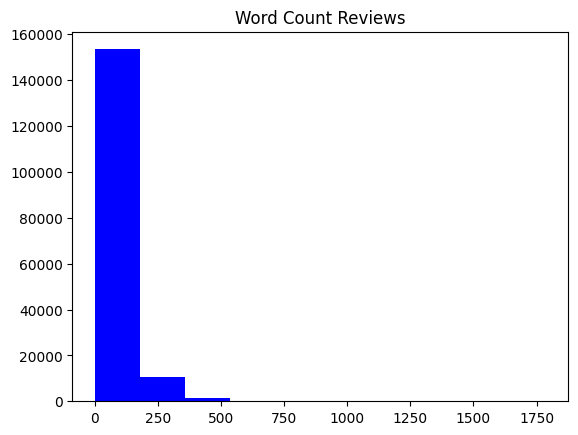

In [ ]:
df_reviews_sample['word_count'] = df_reviews_sample['review_text'].apply(lambda x: len(str(x).split()))
# PLOTTING WORD-COUNT: majority of data are short
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
train_words=df_reviews_sample['word_count']
ax1.hist(train_words,color='blue')
ax1.set_title('Word Count Reviews')
plt.show()

In [ ]:
df_reviews_sample.shape

(166017, 7)

In [ ]:
df_reviews_sample= df_reviews_sample[(df_reviews_sample['word_count']>=5) & (df_reviews_sample['word_count']<=250)]
df_reviews_sample.shape

(149442, 7)

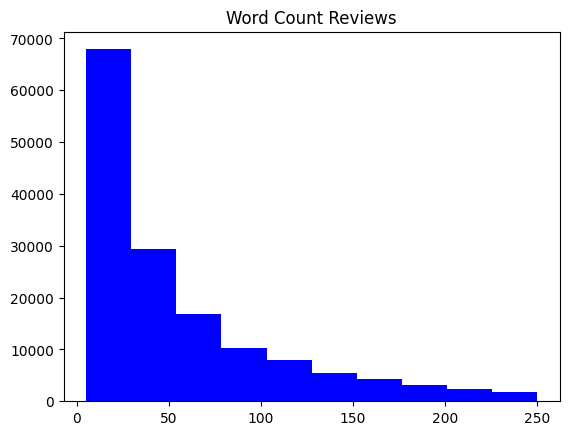

In [ ]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
train_words=df_reviews_sample['word_count']
ax1.hist(train_words,color='blue')
ax1.set_title('Word Count Reviews')
plt.show()

Checking for empty rows

In [ ]:
df_reviews_sample[df_reviews_sample.review_text.str.contains(r"^\s*$")]

,user_id,book_id,review_id,rating,review_text,label,word_count


Checking for missing value

In [ ]:
df_reviews_sample['review_text'].isna().sum()

0

In [ ]:
df_reviews_sample[df_reviews_sample['review_text'].isnull()]

,user_id,book_id,review_id,rating,review_text,label,word_count


In [ ]:
df_reviews_sample.head()

,user_id,book_id,review_id,rating,review_text,label,word_count
0,c8d45b7d0f96c3ff949bb45100abcba2,18045891,6b3ea87e4a1c4ad1fdb0e31451f3e1bc,1,incredibly disturbing creepy ick not idea good...,negative,8
2,c2a085c9f5d627f105dae8e0d1692ced,33151805,8e62ae0815512dfb45bd33d8dd904750,1,zero best word use describe book number stars ...,negative,29
3,4d5935f7e37c3bcd4d3d8586f30af15d,16316,68c4b9d83013d3dd8020e79430cc9ce1,1,worst book world felt like would never end see...,negative,13
4,47e371d09b073e720ab6b856a4eeabfd,18492486,1ec72e33fd6ccf60dac787efed6bc658,1,really wanted like book love diners love mobil...,negative,41
5,dc862066e4b51afc0dea77def7448908,13708346,81e937215a218bc2524cadde37d13689,1,not good story recycled predictable villain ma...,negative,9


In [ ]:
#Dropping rows with missing data or empty strings

df_reviews_sample = df_reviews_sample[~df_reviews_sample.review_text.str.contains(r"^\s*$")]
df_reviews_sample.drop(columns="word_count", inplace = True)

df_reviews_sample.shape

(149442, 6)

In [ ]:
df_reviews_sample.head(10)

,user_id,book_id,review_id,rating,review_text,label
0,c8d45b7d0f96c3ff949bb45100abcba2,18045891,6b3ea87e4a1c4ad1fdb0e31451f3e1bc,1,incredibly disturbing creepy ick not idea good...,negative
2,c2a085c9f5d627f105dae8e0d1692ced,33151805,8e62ae0815512dfb45bd33d8dd904750,1,zero best word use describe book number stars ...,negative
3,4d5935f7e37c3bcd4d3d8586f30af15d,16316,68c4b9d83013d3dd8020e79430cc9ce1,1,worst book world felt like would never end see...,negative
4,47e371d09b073e720ab6b856a4eeabfd,18492486,1ec72e33fd6ccf60dac787efed6bc658,1,really wanted like book love diners love mobil...,negative
5,dc862066e4b51afc0dea77def7448908,13708346,81e937215a218bc2524cadde37d13689,1,not good story recycled predictable villain ma...,negative
6,4c445b4b34fc8f4ada2ddcd819a05b58,368449,5c7fbb4bcde0a004abe524c4c03d209d,1,not great reads like th grader really well con...,negative
7,6096427ce218e7965671ef46f8fbaa31,10448215,e60d2669f94ca9977a5777ab96cc694c,1,book appeal fans dan brown plot relies main ch...,negative
8,b7d8a8a36da8cbf54aa0dbad66f37dfe,78129,5b88e73a69479f43eb02c432aacc5e54,1,several people know read loved series thought ...,negative
9,7cbe23bcf53f42276f237316ba79b6d7,12257650,7a0abc268fdaec9cebff7811bb13e4e4,1,read one gave made think comic book maybe year...,negative
10,22496af88f94ec2203ce5656ee2852f0,27868408,0af66bd97cfc1f7231f2cb2f8c6b9256,1,book soo slow end not justify means know got g...,negative


In [ ]:
!pip install langid
import pandas as pd
import langid



df_reviews_sample['language'] = df_reviews_sample['review_text'].apply(lambda x: langid.classify(x)[0])


non_english_reviews = df_reviews_sample[df_reviews_sample['language'] != 'en']

print(non_english_reviews.shape)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941172 sha256=28b1c1f27b6598d45fa57ca9d3754f7b034e04b7bacf9266689d66870e3c3183
  Stored in directory: /root/.cache/pip/wheels/23/c8/c6/eed80894918490a175677414d40bd7c851413bbe03d4856c3c
Successfully built langid
(3791, 7)


In [ ]:
non_english_reviews.groupby(['language', 'rating']).size().reset_index(name='count')

,language,rating,count
0,af,1,6
1,af,2,19
2,af,3,48
3,af,4,68
4,af,5,57
...,...,...,...
198,xh,2,1
199,xh,3,1
200,xh,4,1
201,zu,3,1


In [ ]:
non_english_reviews

,user_id,book_id,review_id,rating,review_text,label,language
38,11055c4cba8b7e54f657e027bea20923,694368,bedf1d64cd8c4365e1c4069c6726df03,1,preposterous dialog moronic violence stopped r...,negative,tl
133,9eb901b85e7aa8b131158cc346546aaf,24422342,fcf1886b59aa1041a003f3e9740140e8,1,superb read days arlidge keeps delivering di h...,negative,id
173,7e220dd030294c01c7c545d345b12fd0,3609581,29d351422092614f31e80c2e46b94295,1,disappointment felt like bad written stephen k...,negative,nb
329,a1d0b13b1bd6a237c5426d625723b03d,149470,3a8085e5b5a867b541946b5b68b9c49e,1,even make page usual test reads flat,negative,nl
348,b77a0e9fcb0b16d18b66c572b1178e26,6353612,cfcd3a7026df5f0a50178ba8f8b18735,1,ridiculous make sense stupid humorous boring m...,negative,hr
...,...,...,...,...,...,...,...
165930,970bc34e0780e6977937b82d59af5cc9,31226431,9aec711af85c17ea35cc8c78ceb0ed09,5,savannah georgia exciting setting get better m...,positive,af
165988,147d4cdc51c9831d8f00689e2342aeed,9014,267c97fd4fdae3943cbd5d78647840b0,5,read around listen audio book,positive,de
166004,52e84206dc2dad12f598943781ae2869,6013077,44d3d5ba675a2f6770a9f6cabfa7f92d,5,fantastic interesting engaging plot believable...,positive,id
166007,b399d7813ec420f667afe7c368cb2019,5806181,c485d4164fa0d1760ad53f6f0de4bff4,5,great horror science fiction set modern day,positive,fr


In [ ]:
df_reviews_sample = df_reviews_sample[df_reviews_sample['language'] == 'en']
print(df_reviews_sample.shape)

(145651, 7)


In [ ]:
df_reviews_sample.head()

,user_id,book_id,review_id,rating,review_text,label,language
0,c8d45b7d0f96c3ff949bb45100abcba2,18045891,6b3ea87e4a1c4ad1fdb0e31451f3e1bc,1,incredibly disturbing creepy ick not idea good...,negative,en
2,c2a085c9f5d627f105dae8e0d1692ced,33151805,8e62ae0815512dfb45bd33d8dd904750,1,zero best word use describe book number stars ...,negative,en
3,4d5935f7e37c3bcd4d3d8586f30af15d,16316,68c4b9d83013d3dd8020e79430cc9ce1,1,worst book world felt like would never end see...,negative,en
4,47e371d09b073e720ab6b856a4eeabfd,18492486,1ec72e33fd6ccf60dac787efed6bc658,1,really wanted like book love diners love mobil...,negative,en
5,dc862066e4b51afc0dea77def7448908,13708346,81e937215a218bc2524cadde37d13689,1,not good story recycled predictable villain ma...,negative,en


Obtaining the cleaned dataset for the tasks

- text classification
- topic modeling

In [ ]:
df_reviews_sample.to_csv('/content/gdrive/MyDrive/Text Mining/Progetto_Brambatti_Fracchia_Privitera/Data/df_reviews_preprocessed.csv')